# K-means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv' , index_col=0)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
X = df.iloc[:,2:]

In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


## Using elbow method

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

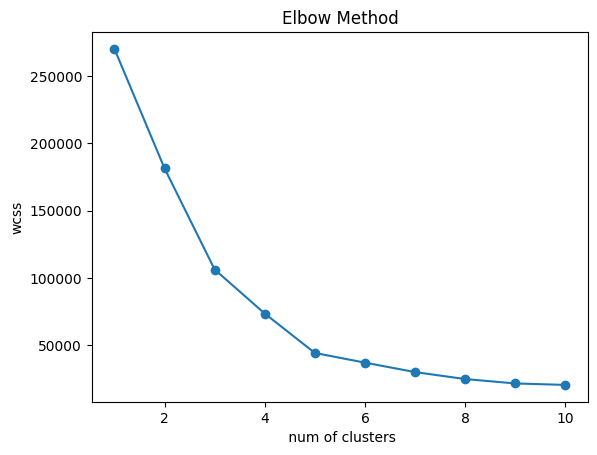

In [ ]:
plt.plot(range(1,11), wcss , marker='o')
plt.title('Elbow Method')
plt.xlabel(' num of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
 # perform 5 clusters
 kmeans = KMeans(n_clusters=5 , random_state=0)
 X['Cluster'] = kmeans.fit_predict(X)
 X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,4
2,15,81,3
3,16,6,4
4,16,77,3
5,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

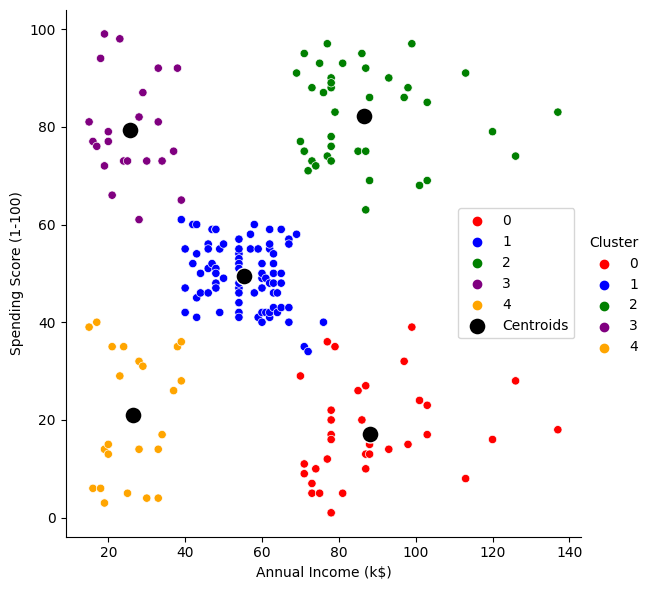

In [ ]:
# Define your custom color palette for the clusters

custom_palette = ["red", "blue", "green", "purple", "orange"]
centroid_color = "black"
sns.relplot(
    x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", data=X,
    palette=custom_palette, height=6
)

sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color=centroid_color,
    marker="o", s=150, label="Centroids"
)
